Correlation plot is between one population and two varaibles of comparison
T - tests compare means between two populations and one variable of comparison


stats.ttest_ind(df[df.State == 'UT'].Score, df[df.State =='UT'].Score)

        http://localhost:8888/tree?token=bbd94d3c8195a226912c267fd29c4a6191bbfd8ecd3afb6a

        crime-housing-austin-2015.csv
0.05 p - vaue is saying that there is a 1 in 20 chance that

A p-value less than 0.05 is typically considered to be statistically significant, in which case the null hypothesis should be rejected. A p-value greater than 0.05 means that deviation from the null hypothesis is not statistically significant, and the null hypothesis is not rejected




Potential t - test: two separate locations (or types of locations) and comparing a ratio of median home income and unemployment

Potential p - value test: median income and unemployment for all zip codes with murder 

,Key,Council_District,Highest_Offense_Desc,Highest_NIBRS_UCR_Offense_Description,Report_Date,Location,Clearance_Status,Clearance_Date,District,Zip_Code_Crime,...,Rentalunitsaffordabletoaverageteacher,Ownerunitsaffordabletoaverageteacher,Rentalunitsaffordabletoaveragetechworker,Ownerunitsaffordabletoaveragetechworker,Changeinpercentageofpopulationbelowpoverty2000-2012,Changeinmedianrent2000-2012,Changeinmedianhomevalue2000-2012,Percentageofhomeswithin1/4-mioftransitstop,Averagemonthlytransportationcost,Percentageofhousingandtransportationcoststhatistransportation-related
1,201511231,4.0,ROBBERY BY ASSAULT,Robbery,1-Jan-15,919 E KOENIG LN SVRD EB,N,13-Jan-15,I,78751.0,...,68%,10%,97%,42%,23%,38%,97%,98%,$550,40%
104,201521081,9.0,BURGLARY OF RESIDENCE,Burglary,2-Jan-15,5003 AVENUE F,N,14-Jan-15,B,78751.0,...,68%,10%,97%,42%,23%,38%,97%,98%,$550,40%
119,201520492,9.0,AGG ASSAULT,Agg Assault,2-Jan-15,4110 GUADALUPE ST,O,6-Jan-15,B,78751.0,...,68%,10%,97%,42%,23%,38%,97%,98%,$550,40%
215,201531167,9.0,AUTO THEFT,Auto Theft,3-Jan-15,1000 E 41ST ST,N,27-Jan-15,B,78751.0,...,68%,10%,97%,42%,23%,38%,97%,98%,$550,40%
226,201531205,9.0,DEADLY CONDUCT,Agg Assault,3-Jan-15,117 FRANKLIN BLVD,N,27-Jan-15,I,78751.0,...,68%,10%,97%,42%,23%,38%,97%,98%,$550,40%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38313,20153630594,9.0,BURGLARY OF VEHICLE,Theft,29-Dec-15,1000 E 41ST ST,N,5-Jan-16,B,78751.0,...,68%,10%,97%,42%,23%,38%,97%,98%,$550,40%
38421,20158004687,9.0,BURGLARY OF VEHICLE,Theft,30-Dec-15,3901 DUVAL ST,N,5-Jan-16,B,78751.0,...,68%,10%,97%,42%,23%,38%,97%,98%,$550,40%
38429,20155056882,9.0,BURGLARY OF VEHICLE,Theft,30-Dec-15,4600 W GUADALUPE ST,N,5-Jan-16,B,78751.0,...,68%,10%,97%,42%,23%,38%,97%,98%,$550,40%
38519,20155056938,9.0,BURGLARY OF VEHICLE,Theft,31-Dec-15,4501 GUADALUPE ST,N,4-Jan-16,B,78751.0,...,68%,10%,97%,42%,23%,38%,97%,98%,$550,40%


,Key,Council_District,Highest_Offense_Desc,Highest_NIBRS_UCR_Offense_Description,Report_Date,Location,Clearance_Status,Clearance_Date,District,Zip_Code_Crime,...,Rentalunitsaffordabletoaverageteacher,Ownerunitsaffordabletoaverageteacher,Rentalunitsaffordabletoaveragetechworker,Ownerunitsaffordabletoaveragetechworker,Changeinpercentageofpopulationbelowpoverty2000-2012,Changeinmedianrent2000-2012,Changeinmedianhomevalue2000-2012,Percentageofhomeswithin1/4-mioftransitstop,Averagemonthlytransportationcost,Percentageofhousingandtransportationcoststhatistransportation-related
1,201511231,4.0,ROBBERY BY ASSAULT,Robbery,1-Jan-15,919 E KOENIG LN SVRD EB,N,13-Jan-15,I,78751.0,...,68%,10%,97%,42%,23%,38%,97%,98%,$550,40%
104,201521081,9.0,BURGLARY OF RESIDENCE,Burglary,2-Jan-15,5003 AVENUE F,N,14-Jan-15,B,78751.0,...,68%,10%,97%,42%,23%,38%,97%,98%,$550,40%
119,201520492,9.0,AGG ASSAULT,Agg Assault,2-Jan-15,4110 GUADALUPE ST,O,6-Jan-15,B,78751.0,...,68%,10%,97%,42%,23%,38%,97%,98%,$550,40%
215,201531167,9.0,AUTO THEFT,Auto Theft,3-Jan-15,1000 E 41ST ST,N,27-Jan-15,B,78751.0,...,68%,10%,97%,42%,23%,38%,97%,98%,$550,40%
226,201531205,9.0,DEADLY CONDUCT,Agg Assault,3-Jan-15,117 FRANKLIN BLVD,N,27-Jan-15,I,78751.0,...,68%,10%,97%,42%,23%,38%,97%,98%,$550,40%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38313,20153630594,9.0,BURGLARY OF VEHICLE,Theft,29-Dec-15,1000 E 41ST ST,N,5-Jan-16,B,78751.0,...,68%,10%,97%,42%,23%,38%,97%,98%,$550,40%
38421,20158004687,9.0,BURGLARY OF VEHICLE,Theft,30-Dec-15,3901 DUVAL ST,N,5-Jan-16,B,78751.0,...,68%,10%,97%,42%,23%,38%,97%,98%,$550,40%
38429,20155056882,9.0,BURGLARY OF VEHICLE,Theft,30-Dec-15,4600 W GUADALUPE ST,N,5-Jan-16,B,78751.0,...,68%,10%,97%,42%,23%,38%,97%,98%,$550,40%
38519,20155056938,9.0,BURGLARY OF VEHICLE,Theft,31-Dec-15,4501 GUADALUPE ST,N,4-Jan-16,B,78751.0,...,68%,10%,97%,42%,23%,38%,97%,98%,$550,40%


PearsonRResult(statistic=-0.7653956678359591, pvalue=8.52226312937041e-08)

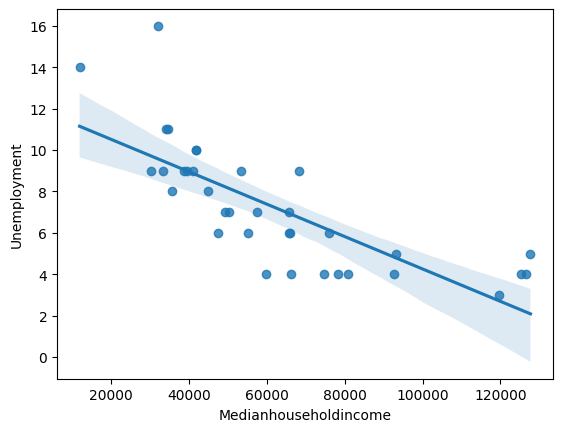

In [103]:
import pandas as pd

import seaborn as sns

import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

dataset = pd.read_csv('crime-housing-austin-2015.csv')
dataset['Medianhouseholdincome'] = dataset['Medianhouseholdincome'].str.replace('$', '').astype('float')
dataset['Unemployment'] = dataset['Unemployment'].str.replace('%', '').astype('float')
dataset['Medianrent'] = dataset['Medianrent'].str.replace('$', '').astype('float')
dataset['Populationwithdisability'] = dataset['Populationwithdisability'].str.replace('%', '').astype('float')
dataset= dataset.dropna()


display(dataset[dataset.Zip_Code_Crime == 78751])

datasetGrouped = dataset.groupby(['Zip_Code_Crime']).agg({'Medianhouseholdincome':'first', 'Unemployment':'first','Populationwithdisability':'first','Medianrent':'first'}).reset_index()
lowIncome = dataset[dataset.Medianhouseholdincome <= 30000]
display(dataset[dataset.Zip_Code_Crime == 78751])





lowIncomeAndHighUnemployment = lowIncome[lowIncome.Unemployment < 12]
##len(lowIncomeAndHighUnemployment)


sns.regplot(x='Medianhouseholdincome', y='Unemployment',data=datasetGrouped)


display(stats.pearsonr(datasetGrouped.Medianhouseholdincome, datasetGrouped.Unemployment))


# yeah = (dataset['Zip_Code_Crime'] == 78751.0).sum()
# yeah
##dataset

PearsonRResult(statistic=0.7302797505219478, pvalue=6.376948592997019e-07)

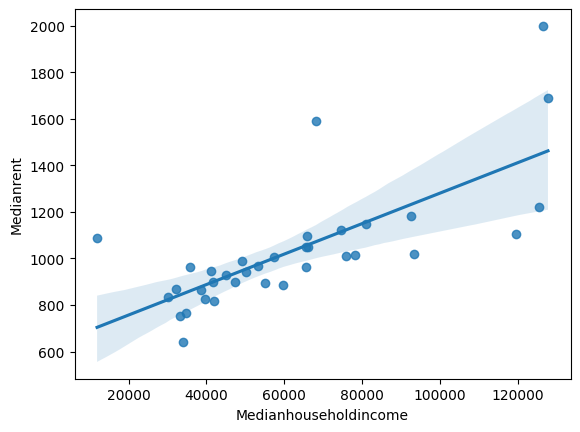

In [104]:
sns.regplot(x='Medianhouseholdincome', y='Medianrent',data=datasetGrouped)
display(stats.pearsonr(datasetGrouped.Medianhouseholdincome, datasetGrouped.Medianrent))


PearsonRResult(statistic=-0.5498095419720337, pvalue=0.0006232477905689733)

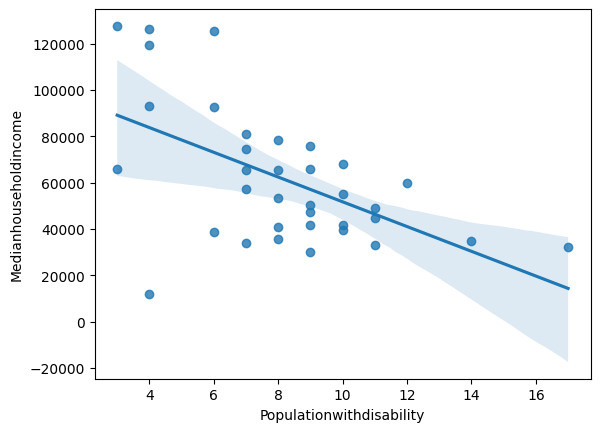

In [105]:
sns.regplot(x='Populationwithdisability', y='Medianhouseholdincome',data=datasetGrouped)
display(stats.pearsonr(datasetGrouped.Populationwithdisability, datasetGrouped.Medianhouseholdincome))



,Zip_Code_Crime,count,Medianhouseholdincome,Unemployment,Populationwithdisability,Medianrent
0,78753.0,3219,39593.0,9.0,10.0,826.0
1,78741.0,2760,30183.0,9.0,9.0,835.0
2,78704.0,2392,50248.0,7.0,9.0,940.0
3,78758.0,2382,41792.0,10.0,9.0,898.0
4,78745.0,2272,49243.0,7.0,11.0,990.0
5,78723.0,2040,41869.0,10.0,10.0,817.0
6,78701.0,1993,68152.0,9.0,10.0,1590.0
7,78744.0,1798,41056.0,9.0,8.0,946.0
8,78702.0,1585,34734.0,11.0,14.0,766.0
9,78748.0,1419,65889.0,6.0,9.0,1095.0


PearsonRResult(statistic=0.37567594670094717, pvalue=0.026149361083944212)

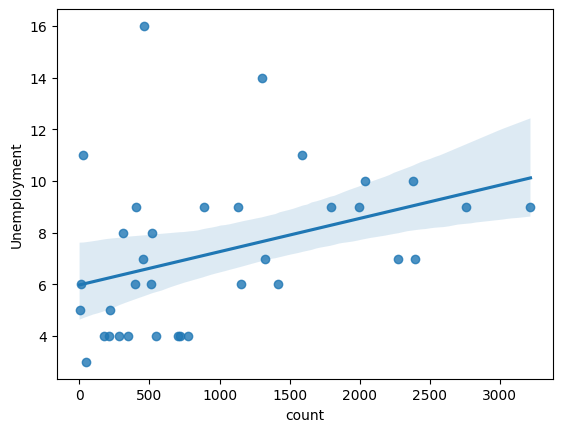

In [110]:
occurrences_per_value= dataset['Zip_Code_Crime'].value_counts().reset_index()
#display(occurrences_per_value)

mergedDatasets = pd.merge(occurrences_per_value, datasetGrouped, on='Zip_Code_Crime')

##display(dataset['Medianhouseholdincome'][dataset.Zip_Code_Crime == 78728.0])
display(mergedDatasets)

#display(mergedDatasets)
##sns.regplot(x='Zip_Code_Crime', y='Medianhouseholdincome',data=dataset)
sns.regplot(x='count', y='Unemployment',data=mergedDatasets)
display(stats.pearsonr(mergedDatasets['Unemployment'], mergedDatasets['count']))
